In [1]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import math
from statistics import mean,stdev
from matplotlib import style
style.use('ggplot')

In [2]:
data = pd.read_csv("./data/browser-ww.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              157 non-null    object 
 1   Chrome            157 non-null    float64
 2   IE                157 non-null    float64
 3   Firefox           157 non-null    float64
 4   Safari            157 non-null    float64
 5   Opera             157 non-null    float64
 6   Android           157 non-null    float64
 7   UC Browser        157 non-null    float64
 8   Samsung Internet  157 non-null    float64
 9   Edge Legacy       157 non-null    float64
 10  Nokia             157 non-null    float64
 11  BlackBerry        157 non-null    float64
 12  IEMobile          157 non-null    float64
 13  Edge              157 non-null    float64
 14  NetFront          157 non-null    float64
 15  Yandex Browser    157 non-null    float64
 16  360 Safe Browser  157 non-null    float64
 1

In [5]:
data.tail()

,Date,Chrome,IE,Firefox,Safari,Opera,Android,UC Browser,Samsung Internet,Edge Legacy,...,AOL,SeaMonkey,Openwave,Phantom,Whale Browser,SonyEricsson,Pale Moon,Obigo,Jasmine,Other
152,2021-12,63.80,0.46,3.91,19.60,2.35,0.68,0.94,2.85,0.09,...,0.0,0.0,0.0,0.0,0.11,0.0,0.01,0.0,0.0,0.02
153,2022-01,63.06,0.45,4.18,19.84,2.33,0.65,0.89,2.89,0.08,...,0.0,0.0,0.0,0.0,0.12,0.0,0.01,0.0,0.0,0.22
154,2022-02,62.78,0.47,4.21,19.30,2.26,0.65,0.86,2.77,0.15,...,0.0,0.0,0.0,0.0,0.11,0.0,0.01,0.0,0.0,1.23
155,2022-03,64.53,0.38,3.40,18.84,2.22,0.64,0.82,2.82,0.13,...,0.0,0.0,0.0,0.0,0.12,0.0,0.01,0.0,0.0,0.93
156,2022-04,64.34,0.39,3.41,19.16,2.07,0.76,0.84,2.85,0.16,...,0.0,0.0,0.0,0.0,0.11,0.0,0.01,0.0,0.0,0.68


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Chrome'>)

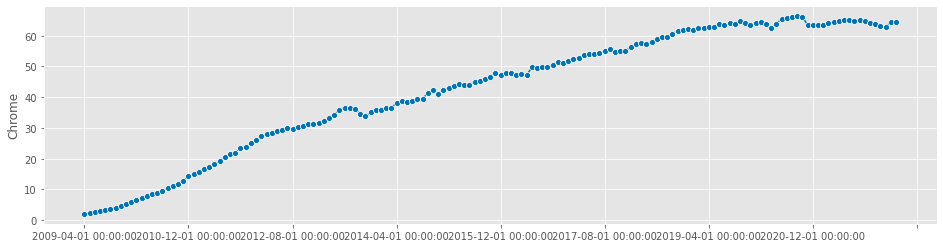

In [8]:
plot_series(data['Chrome'])

In [9]:
y_train, y_test = temporal_train_test_split(data['Edge Legacy'], test_size=24)

In [10]:
from sktime.forecasting.ets import AutoETS

In [11]:
aaa = AutoETS(error="add", trend="add", seasonal="add", sp = 4)
aaa.fit(y_train)

/home/c0sta/PycharmProjects/1899_full_msu_courser_data_analisis/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AutoETS(seasonal='add', sp=4, trend='add')

In [13]:
aaa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:            Edge Legacy   No. Observations:                  133
Model:                       ETS(AAA)   Log Likelihood                 172.723
Date:                Sat, 14 May 2022   AIC                           -325.446
Time:                        18:38:44   BIC                           -296.543
Sample:                    04-01-2009   HQIC                          -313.701
                         - 04-01-2020   Scale                            0.004
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.097     10.327      0.000       0.810       1.190
smoothing_trend        0.1238      0.058      2.124      0.034       0.010       0.238
smoothing_seasonal   1.41e-05        nan        nan        nan         nan         nan
initial_level          0.0008        nan        nan        nan         nan         nan
initial_trend         -0.0008      0.033     -0.025      0.980      -0.065       0.064
initial_seasonal.0     0.0013        nan        nan        nan         nan         nan
initial_seasonal.1     0.0092        nan        nan        nan         nan         nan
initial_seasonal.2     0.0127        nan        nan        nan         nan         nan
initial_seasonal.3          0        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       14.25   Jarque-Bera (JB):              1705.74
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):             121.39   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [14]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#диаграмма рассеивания(scatterplot)

<AxesSubplot:xlabel='year', ylabel='passengers'>

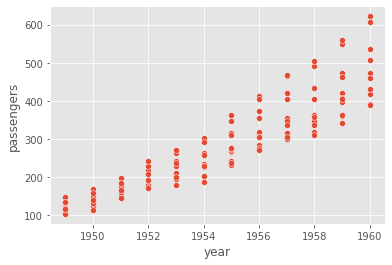

In [15]:
sns.scatterplot(data=flights_data, x="year", y="passengers")

#линейный график(lineplot)


<AxesSubplot:xlabel='year', ylabel='passengers'>

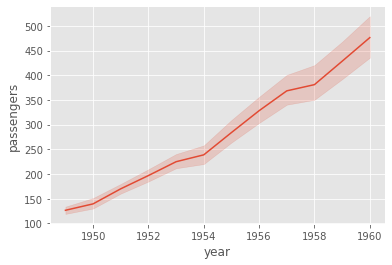

In [16]:
sns.lineplot(data=flights_data, x="year", y="passengers")

*CТОЛБЧАТАЯ ДИАГРАММА*

<AxesSubplot:xlabel='year', ylabel='passengers'>

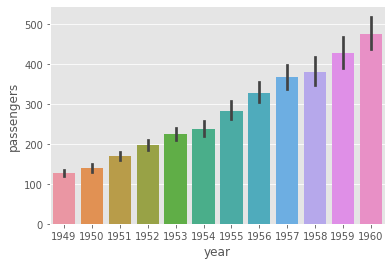

In [17]:
sns.barplot(data=flights_data, x="year", y="passengers")

<AxesSubplot:xlabel='depth', ylabel='count'>

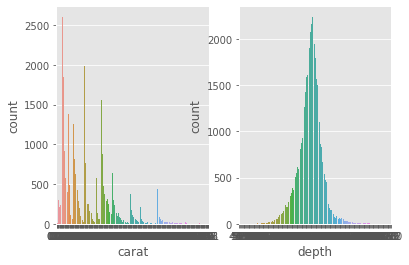

In [18]:
diamonds_data = sns.load_dataset('diamonds')
plt.subplot(1, 2, 1)
sns.countplot(x='carat', data=diamonds_data)
plt.subplot(1, 2, 2)
sns.countplot(x='depth', data=diamonds_data)

*ГИСТОГРАММА*

In [19]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

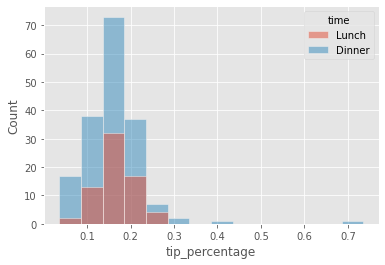

In [21]:
tips_df["tip_percentage"] = tips_df["tip"] / tips_df["total_bill"]
tips_df.head()
sns.histplot(data=tips_df, x="tip_percentage", binwidth=0.05, hue="time")